In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
df= pd.read_csv(r"multi linear.csv")
df.head(2)

,StudyHours,ExtraParticipation,PapersPracticed,PreviousMarks,SleepingHours,PerformanceIndex
0,5,No,2,69,8,51
1,2,Yes,8,46,4,20


In [116]:
df.drop(columns=["ExtraParticipation"],inplace=True)


In [117]:
df.head()

,StudyHours,PapersPracticed,PreviousMarks,SleepingHours,PerformanceIndex
0,5,2,69,8,51
1,2,8,46,4,20
2,7,5,56,7,46
3,6,5,42,8,28
4,7,6,53,4,41


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   StudyHours        10000 non-null  int64
 1   PapersPracticed   10000 non-null  int64
 2   PreviousMarks     10000 non-null  int64
 3   SleepingHours     10000 non-null  int64
 4   PerformanceIndex  10000 non-null  int64
dtypes: int64(5)
memory usage: 390.8 KB


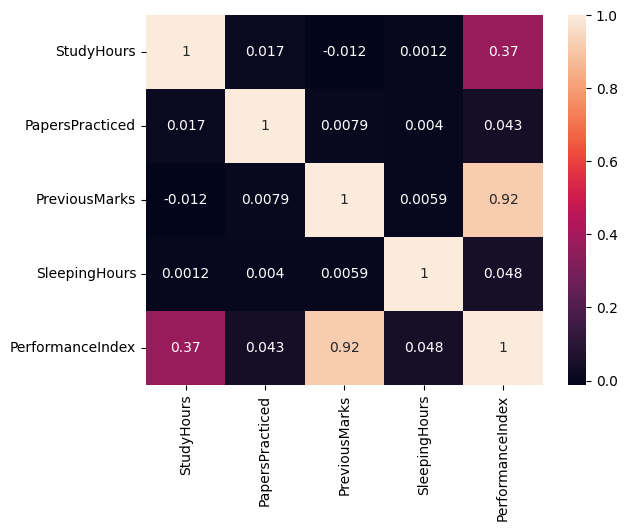

In [119]:
sns.heatmap(data=df.corr(),annot=True)
plt.show()

In [120]:
x=df.iloc[:,:-1]
y=df["PerformanceIndex"]

In [121]:
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)
x

,StudyHours,PapersPracticed,PreviousMarks,SleepingHours
0,0.002742,-0.900982,-0.025700,0.866505
1,-1.155926,1.191649,-1.351938,-1.492294
2,0.775188,0.145333,-0.775313,0.276805
3,0.388965,0.145333,-1.582588,0.866505
4,0.775188,0.494105,-0.948301,-1.492294
...,...,...,...,...
9995,1.161410,0.494105,-1.121288,-0.312895
9996,-0.383481,-0.552210,-0.083363,1.456205
9997,1.547633,0.494105,-1.236613,0.276805
9998,-1.542149,-1.598526,-1.294276,1.456205


In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#LinearRegression

In [123]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100

98.78107135868811

In [133]:
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test, lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

4.526006180883856
1.6730747935378134
2.1274412285381366


In [124]:
lr.coef_

array([ 7.37375407,  0.5687309 , 17.68024824,  0.79742315])

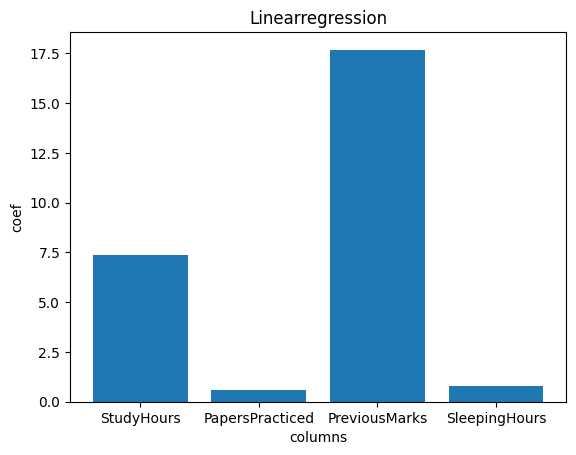

In [125]:
plt.bar(x.columns,lr.coef_)
plt.title("Linearregression")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

#Lasso

In [126]:
la=Lasso(alpha=0.5)
la.fit(x_train,y_train)
la.score(x_test,y_test)*100

98.52069473786358

In [134]:
print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test, la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))

5.492811090760442
1.8539419764866196
2.343674698152549


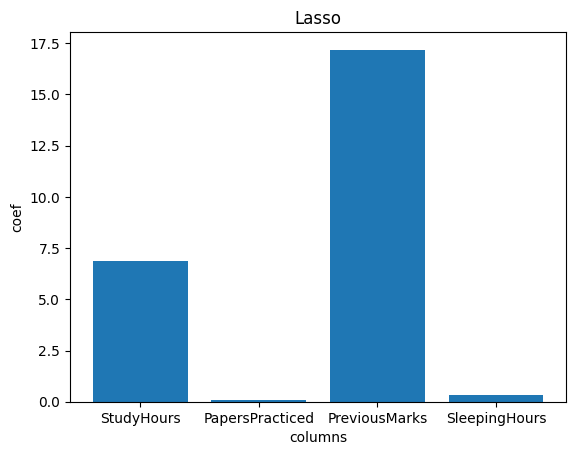

In [127]:
plt.bar(x.columns,la.coef_)
plt.title("Lasso")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

#Ridge

In [128]:
ri=Ridge(alpha=10)
ri.fit(x_train,y_train)
ri.score(x_test,y_test)*100

98.78148288314874

In [135]:
print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test, ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))

4.52447814865191
1.6733016035021424
2.1270820737930896


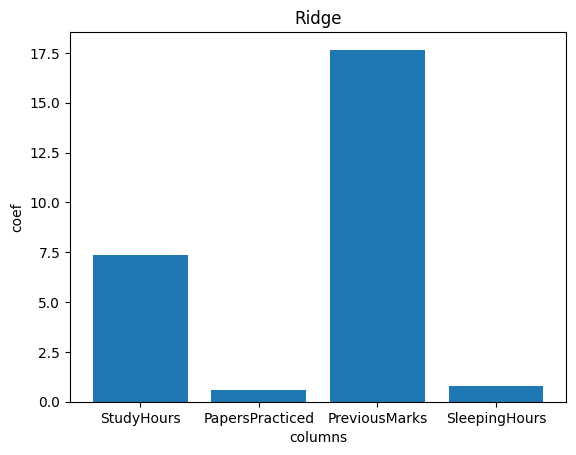

In [129]:
plt.bar(x.columns,ri.coef_)
plt.title("Ridge")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

In [137]:
df=pd.DataFrame({"col_name":x.columns,"LinearRegression":lr.coef_,"Lasso":la.coef_,"Ridge":ri.coef_})
df

,col_name,LinearRegression,Lasso,Ridge
0,StudyHours,7.373754,6.872247,7.364168
1,PapersPracticed,0.568731,0.084195,0.568279
2,PreviousMarks,17.680248,17.180424,17.658047
3,SleepingHours,0.797423,0.313846,0.796713
